## <center>NBA Analytics Data Analysis Project<center>
### <center>Inferential Statistics Notebook<center>  
    
#### <center>presented by Brian Zamkotowicz for Springboard Capstone Project<center>


In phases 1 and 2 of this NBA Analytics Project I organized the data into useable form and began to provide graphic representaion of some of the variables that might be used when attempting to build a better NBA team.  This Inferential Statistics Notebook intends to build upon and further that analysis by further examining the relationships between certain variable metrics and changes in team wins.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np


# the first step is to un-pickle the data that was saved at the end of the Data Wrangling Notebook

hoops_data = pd.read_pickle('C://Users/Home Office/hoops_data.pickle')
hoops_data1 = hoops_data.dropna()
hoops_data1.head()

,Tm,Year,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta
1,ATL,2012,28.666667,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,-4.0
2,ATL,2013,26.888889,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,4.0
3,ATL,2014,25.739130,0.746189,28.556464,10.4,265.2,-0.039241,-0.3,2.783867,19.7,ATL,2014,38,-6.0
4,ATL,2015,26.631579,-1.173145,24.713699,9.1,218.3,-3.842764,-1.3,-1.919334,-46.9,ATL,2015,60,22.0
6,BOS,2012,28.421053,5.789482,45.277074,16.3,221.5,-7.023784,-3.1,2.267505,-89.9,BOS,2012,39,-17.0


One reasonable way to examine the relationship between the chosen variables and change in wins is by looking at Pearson correlation coefficients as shown below.

In [2]:
WORP_Pearson =(scipy.stats.pearsonr(hoops_data1['WORP_Chg'], hoops_data1['Win_Delta']))
VORP_Pearson = (scipy.stats.pearsonr(hoops_data1['VORP_Chg'], hoops_data1['Win_Delta']))
BPM_A_Pearson =(scipy.stats.pearsonr(hoops_data1['BPM_A_Chg'], hoops_data1['Win_Delta']))
PER_Pearson = (scipy.stats.pearsonr(hoops_data1['PER_Chg'], hoops_data1['Win_Delta']))

print("WORP_Pearson = ", WORP_Pearson)
print("VORP_Pearson = ", VORP_Pearson)
print("BPM_A_Pearson = ", BPM_A_Pearson)
print("PER_Pearson = ", PER_Pearson)

WORP_Pearson =  (0.3340651515935038, 0.00019230714271517446)
VORP_Pearson =  (0.3270537732683617, 0.0002663617564581372)
BPM_A_Pearson =  (0.27241342726842066, 0.0026120697699333027)
PER_Pearson =  (-0.0815333961917619, 0.37600556347916425)


Change in WORP, VORP, BPM_A, all seem to show reasonable correlation to change in wins, PER however does not seem to be an effective predictor of Win_Delta.

In [3]:
#break each stat category into thirds for later analysis

print(np.percentile(hoops_data1['WORP_Chg'], [33,66]))
print(np.percentile(hoops_data1['VORP_Chg'], [33,66]))
print(np.percentile(hoops_data1['BPM_A_Chg'], [33,66]))
print(np.percentile(hoops_data1['PER_Chg'], [33,66]))

[-7.25193738  3.53394982]
[-2.773  1.27 ]
[-3.02092912  1.70001778]
[-14.733  18.454]


In [4]:
#build new dataframes of top and bottom 3rds based on each stat

#WORP
bad_teams = hoops_data1[hoops_data1['WORP_Chg'] <=-7.2536]
good_teams = hoops_data1[hoops_data1['WORP_Chg'] >=3.5362]

#VORP
low_VORP = hoops_data1[hoops_data1['VORP_Chg'] <=-2.773]
top_VORP = hoops_data1[hoops_data1['VORP_Chg'] <= 1.27]

#BPM_A
low_BPM_A = hoops_data1[hoops_data1['BPM_A_Chg'] <=-3.0225]
top_BPM_A = hoops_data1[hoops_data1['BPM_A_Chg'] <=1.7]

#PER_Chg

low_PER = hoops_data1[hoops_data1['PER_Chg'] <=-14.733]
top_PER = hoops_data1[hoops_data1['PER_Chg'] <=18.454]


In [5]:
print ('Bottom 3rd of NBA (in WORP_Chg):')
print ('Mean Change in Wins: ', np.mean(bad_teams['Win_Delta']))
print ('Standard Deviation: ', np.std(bad_teams['Win_Delta']))
print ('95% Confidence Interval:', np.percentile(bad_teams['Win_Delta'], [2.5, 97.5]))
print ('Margin of Error:', 1.96 * np.std(bad_teams['Win_Delta'])/ np.sqrt(len(bad_teams['Win_Delta'])))
print('')
print('Top 3rd of NBA (in WORP_Chg)')
print ('Mean Change in Wins: ', np.mean(good_teams['Win_Delta']))
print ('Standard Deviation: ', np.std(good_teams['Win_Delta']))
print ('95% Confidence Interval:', np.percentile(good_teams['Win_Delta'], [2.5, 97.5]))
print ('Margin of Error:', 1.96 * np.std(good_teams['Win_Delta'])/ np.sqrt(len(good_teams['Win_Delta'])))

mean_diff = np.mean(bad_teams['Win_Delta'])- np.mean(good_teams['Win_Delta'])
print('')
print('Difference in Win Delta Between Bottom and Top 3rd of League in Terms of Change in WORP: ', round(mean_diff, 4))


Bottom 3rd of NBA (in WORP_Chg):
Mean Change in Wins:  -5.65
Standard Deviation:  13.889834412259924
95% Confidence Interval: [-25.05  24.05]
Margin of Error: 4.304504280402099

Top 3rd of NBA (in WORP_Chg)
Mean Change in Wins:  2.902439024390244
Standard Deviation:  9.570801322438946
95% Confidence Interval: [-12.  21.]
Margin of Error: 2.9296277717549226

Difference in Win Delta Between Bottom and Top 3rd of League in Terms of Change in WORP:  -8.5524


The null hypothesesis here would be that there is no statistical significance to the offseason WORP_Chg and its relationship with Win_Delta.  I'll apply an α of 0.05 here.

In [6]:
# run a t-test for statistical significance

difference =scipy.stats.ttest_ind(bad_teams['Win_Delta'], good_teams['Win_Delta'])
print(difference)

Ttest_indResult(statistic=-3.193375164768479, pvalue=0.0020200360406933547)


A p-value of .002 shows no statistical significance to the null hypotheses, and therefore the null hypotheses can be ruled out.  This same test can be applied to each of the statistics.

In [25]:
#build function that shows means, standard deviations, confidence intervals, and margins of error 
    #for 2 samples

def comparison(sample1, sample2, portion):

    print ('Bottom', portion,'of NBA')
    print ('Mean Change in Wins: ', np.mean(sample1))
    print ('Standard Deviation: ', np.std(sample1))
    print ('95% Confidence Interval:', np.percentile(sample1, [2.5, 97.5]))
    print ('Margin of Error:', 1.96 * np.std(sample1)/ np.sqrt(len(sample1)))
    print('')
    print('Top ', portion, ' of NBA')
    print ('Mean Change in Wins: ', np.mean(sample2))
    print ('Standard Deviation: ', np.std(sample2))
    print ('95% Confidence Interval:', np.percentile(sample2, [2.5, 97.5]))
    print ('Margin of Error:', 1.96 * np.std(sample2)/ np.sqrt(len(sample2)))

    mean_diff = np.mean(sample1)- np.mean(sample2)
    print('')
    print('Difference in Win Delta Between Bottom and Top 3rd of League ', round(mean_diff, 4))

    difference =scipy.stats.ttest_ind(sample1, sample2)
    print(difference)

In [8]:
comparison(low_VORP['Win_Delta'], top_VORP['Win_Delta'], 'third')

Bottom third of NBA
Mean Change in Wins:  -6.55
Standard Deviation:  13.421903739782968
95% Confidence Interval: [-25.05  24.05]
Margin of Error: 4.159491062618118

Top  third  of NBA
Mean Change in Wins:  -1.4050632911392404
Standard Deviation:  13.330766724074442
95% Confidence Interval: [-24.05  24.1 ]
Margin of Error: 2.939663732859387

Difference in Win Delta Between Bottom and Top 3rd of League  -5.1449
Ttest_indResult(statistic=-1.9675025066754743, pvalue=0.051491643989810154)


In [9]:
comparison(low_BPM_A['Win_Delta'], top_BPM_A['Win_Delta'], 'third')

Bottom third of NBA
Mean Change in Wins:  -5.75
Standard Deviation:  13.04367662892637
95% Confidence Interval: [-24.075  20.15 ]
Margin of Error: 4.042277266591197

Top  third  of NBA
Mean Change in Wins:  -0.8227848101265823
Standard Deviation:  13.221347806273489
95% Confidence Interval: [-24.05  23.05]
Margin of Error: 2.9155349763515335

Difference in Win Delta Between Bottom and Top 3rd of League  -4.9272
Ttest_indResult(statistic=-1.912813604122864, pvalue=0.058216219851643186)


In [10]:
comparison(low_PER['Win_Delta'], top_PER['Win_Delta'], 'third')


Bottom third of NBA
Mean Change in Wins:  1.4
Standard Deviation:  13.652472303579303
95% Confidence Interval: [-23.1    26.025]
Margin of Error: 4.230945000824283

Top  third  of NBA
Mean Change in Wins:  0.22784810126582278
Standard Deviation:  13.211952171403677
95% Confidence Interval: [-23.1  24.1]
Margin of Error: 2.913463076989279

Difference in Win Delta Between Bottom and Top 3rd of League  1.1722
Ttest_indResult(statistic=0.44824290246357995, pvalue=0.6548068737299935)


While a WORP comparison was able to invalidate the null hypotheses that the metric has no statistically significant relationionship to Win_Delta, the t-tests for VORP and BPM_A showed a p-value slightly above where I would like.  PER on the other hand was nowhere close to rejecting the null hypothesis.  It is possible that breaking the league into 3rds did not provide enough granularity, and that in using groups that large, they were too similar to each other to invalidate the null hypothesis. Breaking the league into quarters may give a better picture of statistical significance in this case. 

In [26]:
#break each stat category into quarters for later analysis

print(np.percentile(hoops_data1['WORP_Chg'], [25,75]))
print(np.percentile(hoops_data1['VORP_Chg'], [25, 75]))
print(np.percentile(hoops_data1['BPM_A_Chg'], [25, 75]))
print(np.percentile(hoops_data1['PER_Chg'], [25,75]))

[-9.74905475  7.87974009]
[-3.925  2.925]
[-3.62909045  2.83028455]
[-22.275  28.275]


In [12]:
#WORP
low25WORP = hoops_data1[hoops_data1['WORP_Chg'] <=-9.7525]
high25WORP = hoops_data1[hoops_data1['WORP_Chg'] >=7.8775]

#VORP
low25VORP = hoops_data1[hoops_data1['VORP_Chg'] <=-3.925]
top25VORP = hoops_data1[hoops_data1['VORP_Chg'] <= 2.925]

#BPM_A
low25BPM_A = hoops_data1[hoops_data1['BPM_A_Chg'] <=-3.6275]
top25BPM_A = hoops_data1[hoops_data1['BPM_A_Chg'] <=2.8275]

#PER_Chg

low25PER = hoops_data1[hoops_data1['PER_Chg'] <=--22.275]
top25PER = hoops_data1[hoops_data1['PER_Chg'] <=28.275]

In [13]:
comparison(low25WORP['Win_Delta'], high25WORP['Win_Delta'], 'quarter')

Bottom quarter of NBA
Mean Change in Wins:  -7.666666666666667
Standard Deviation:  13.317490587777996
95% Confidence Interval: [-25.55   23.825]
Margin of Error: 4.765602802801978

Top  quarter  of NBA
Mean Change in Wins:  2.933333333333333
Standard Deviation:  9.532167760914735
95% Confidence Interval: [-13.75  20.55]
Margin of Error: 3.411042425656654

Difference in Win Delta Between Bottom and Top 3rd of League  -10.6
Ttest_indResult(statistic=-3.4854678745702445, pvalue=0.0009427466782647643)


In [14]:
comparison(low25VORP['Win_Delta'], top25VORP['Win_Delta'], "quarter")

Bottom quarter of NBA
Mean Change in Wins:  -7.866666666666666
Standard Deviation:  13.45544086564572
95% Confidence Interval: [-25.55   23.825]
Margin of Error: 4.814967675750119

Top  quarter  of NBA
Mean Change in Wins:  -0.6444444444444445
Standard Deviation:  13.008809930292207
95% Confidence Interval: [-23.775  23.775]
Margin of Error: 2.687647976492055

Difference in Win Delta Between Bottom and Top 3rd of League  -7.2222
Ttest_indResult(statistic=-2.588904301725769, pvalue=0.01083882393828608)


In [15]:
comparison(low25BPM_A['Win_Delta'], top25BPM_A['Win_Delta'], 'quarter')

Bottom quarter of NBA
Mean Change in Wins:  -6.433333333333334
Standard Deviation:  12.566312992370603
95% Confidence Interval: [-24.825  17.3  ]
Margin of Error: 4.496797352519861

Top  quarter  of NBA
Mean Change in Wins:  -0.6666666666666666
Standard Deviation:  13.051181300301266
95% Confidence Interval: [-23.775  23.775]
Margin of Error: 2.696401992230333

Difference in Win Delta Between Bottom and Top 3rd of League  -5.7667
Ttest_indResult(statistic=-2.097548048913632, pvalue=0.03807968253163594)


In [16]:
comparison(low25PER['Win_Delta'], top25PER['Win_Delta'], 'quarter')

Bottom quarter of NBA
Mean Change in Wins:  0.16470588235294117
Standard Deviation:  12.762857008959312
95% Confidence Interval: [-22.8  23.9]
Margin of Error: 2.7132793657470367

Top  quarter  of NBA
Mean Change in Wins:  -0.2222222222222222
Standard Deviation:  12.864920242252035
95% Confidence Interval: [-22.55   23.775]
Margin of Error: 2.65792005895221

Difference in Win Delta Between Bottom and Top 3rd of League  0.3869
Ttest_indResult(statistic=0.1984779186386028, pvalue=0.8429042082506368)


It seems that breaking the league into 4 groups instead of 3 and examining the teams that won and lost the most in relation to each other was a more effective way of invalidating the null hypothesis.  It once again appears that changes in WORP, VORP, and BPM_A have a direct relationship with change in wins.  John Hollinger's PER statistic, however, does not.

Another way of looking at how the factors examined in the data set correlate to each other is with a heat map.  The following table shows a strong correlation between WORP, VORP and BPM_A and also a relationships between those stats and change in wins.  Again, PER seems to be the "odd stat out."

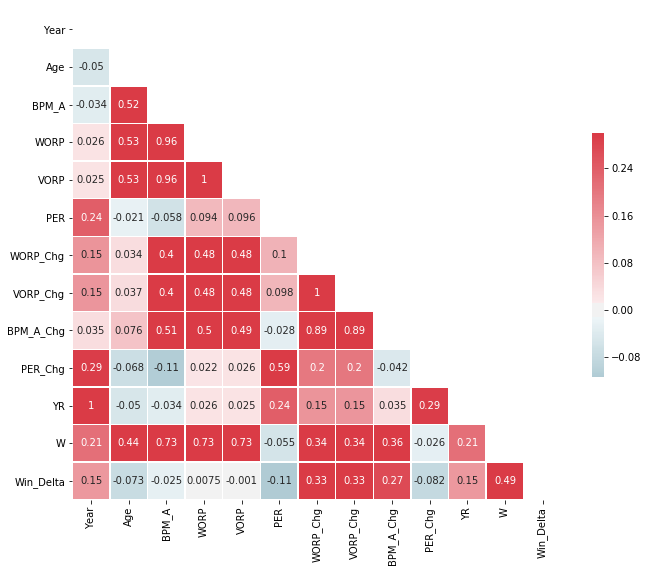

In [17]:
# Compute the correlation matrix
corr = hoops_data1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

One statistic that appears to have a positive relationship to wins is the average age of the players on the team.  It might be of interest to further explore that relationship.

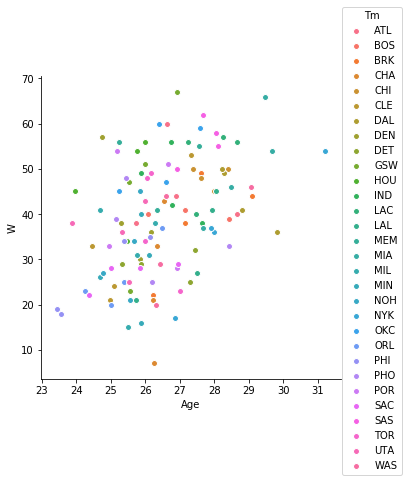

In [18]:

sns.pairplot(x_vars=["Age"], y_vars=["W"], data=hoops_data1, hue="Tm", size=5)

Once again my analysis of age provided unexpected results.  I expected to find a "peak age", after which performance tailed off.  Instead it appears that while there are not many with an average age of above 29, most of them tend to be particularly successful.

In [19]:
# take a look at teams whose average age was above 28

oldest = hoops_data1[hoops_data1['Age'] > 28] 
oldest = oldest[oldest['W'] > 50]
print(oldest)

      Tm  Year        Age      BPM_A       WORP  VORP    PER  WORP_Chg  \
62   LAC  2013  28.666667   3.513465  41.206340  15.1  239.9  1.351885   
63   LAC  2014  28.238095   3.138415  44.723745  16.7  274.7  3.517405   
77   MIA  2013  29.473684   6.784527  54.876998  20.1  234.9  0.097098   
78   MIA  2014  29.684211   6.777464  48.993763  18.5  250.2 -5.883236   
97   NYK  2013  31.210526   3.862652  47.457612  17.5  251.2  8.128390   
132  SAS  2013  28.055556   6.032622  48.463249  18.1  268.2 -6.102520   
134  SAS  2015  28.105263  10.094512  54.466164  20.2  270.7  4.783020   

     VORP_Chg  BPM_A_Chg  PER_Chg ABBR    YR   W  Win_Delta  
62        0.4   1.111687    -33.5  LAC  2013  56       16.0  
63        1.6  -0.375051     34.8  LAC  2014  57        1.0  
77       -0.2  -3.454243     45.5  MIA  2013  66       20.0  
78       -1.6  -0.007063     15.3  MIA  2014  54      -12.0  
97        2.9   1.132190    -92.5  NYK  2013  54       18.0  
132      -2.3  -1.420757    -22.1  

Looking at the teams that played well with an unusually high average age gives some insight into why those teams did well.  The Heat, Lakers and Spurs appear twice each.  Each of those teams was built around a superstar in his 30's (LeBron James, Kobe Bryant, and Tim Duncan respectively), and had veteran free agents brought in with a short term goal of competing for a championship.

The scatter plot above may not give the best representation of the of team performance by age.  The boxplot and swarmplot below give a clearer picture of the distribution of wins by age.

Text(0.5,1,'Swarmplot of Win Totals by Age')

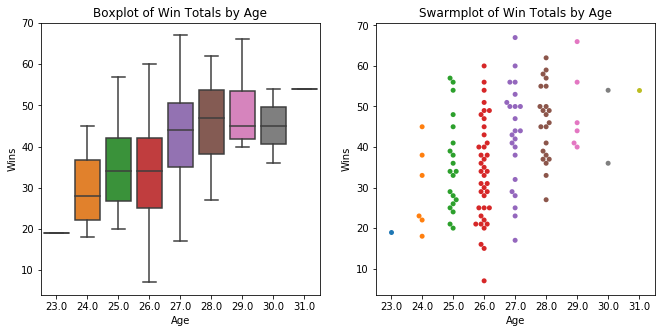

In [41]:
hoops_data2 = hoops_data1.copy()
hoops_data2['Age']= hoops_data2['Age'].round()

plt.rcParams['figure.figsize']=(11,5)
fig = plt.figure()

ax1 = fig.add_subplot (1,2,1)
sns.boxplot(x = 'Age', y = 'W', data = hoops_data2)
plt.ylabel('Wins')
plt.title('Boxplot of Win Totals by Age')

ax2 = fig.add_subplot(1,2,2)
sns.swarmplot(x = 'Age', y = 'W', data = hoops_data2)
plt.ylabel('Wins')
plt.title('Swarmplot of Win Totals by Age')

Unfortunately, I was not able to create an 'age target' that would be useful for quantatative assesment when building a team.  The data did provide some guidelines though.  Teams with an average age below 27 tend to lose more games than they win.  Also, adding veteran players to a team with an older superstar seems to be a successful NBA formula.

Overall, the inferential statistical analysis in this notebook seems to cement the relationship between a team's change in WORP, VORP, and BPM_A in the offseason, and its change in wins in the coming year.  Looking forward, it may be possible to model team results based on those factors.